In [2]:
import torch
import torch.optim as optim
import scipy.optimize as opt
import numpy as np


In [3]:
def density(x,alpha,beta):
    return x**(alpha-1) * (1-x)**(beta-1)

In [4]:
negative_density = lambda x, alpha, beta: -density(x, alpha, beta)
initial_guess = 0.5
alpha = 2
beta = 4
result = opt.minimize(negative_density, initial_guess, args=(alpha, beta))
mode = result.x[0]
print(f"Mode: {mode}")

Mode: 0.25


In [5]:
result.x

array([0.25])

In [6]:
# def negetive_log_likelihood(x):
#     return -np.log(density(x, alpha, beta))

# log_likelihood_second_derivative = np.gradient(np.gradient(negetive_log_likelihood(result.x[0])))
# print(f"Second derivative of log likelihood at mode: {log_likelihood_second_derivative[0]}")

In [7]:
negetive_log_likelihood = lambda x,alpha,beta: -torch.log(density(x,alpha,beta))
alpha = torch.tensor(2.0,requires_grad=True)
beta = torch.tensor(4.0,requires_grad=True)
initial_guess = torch.tensor([0.5], requires_grad=True, dtype=torch.float64)
optimizer = torch.optim.Adam([initial_guess], lr=0.01)
num_steps = 1000
for step in range(num_steps):
    optimizer.zero_grad()  
    loss = negetive_log_likelihood(initial_guess, alpha, beta)
    loss.backward()  
    optimizer.step() 

mode = initial_guess.item()

print(f"Mode: {mode}")

Mode: 0.25


In [8]:
log_negetive_log_likelihood_second_derivative = -(alpha - 1) / mode**2 - (beta - 1) / (1 - mode)**2
variance = 1 / log_negetive_log_likelihood_second_derivative
variance = variance.detach().numpy()
print(f"Variance: {variance}")


Variance: -0.046875


[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

AttributeError: 'int' object has no attribute 'item'

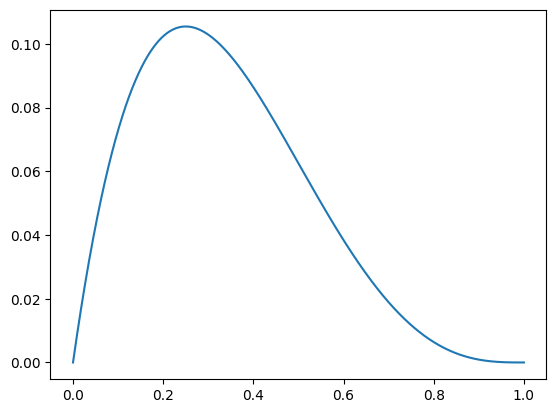

In [14]:
x_values = np.linspace(0, 1, 1000)
print(x_values)
from matplotlib import pyplot as plt
mode=0.25
variance=-0.046875
# variance1=20
gaussian_approximation = (1/(np.sqrt(2 *  np.pi * variance**2))) * (np.exp(-0.5 *((x_values - mode) / variance)**2))

alpha1=4
beta1=4
alpha2=1
beta2=5

print(f"Sum of Gaussian approximation: {np.sum(gaussian_approximation)}")
plt.plot(x_values, density(x_values, alpha.item(), beta.item()), label="Original Density")
plt.plot(x_values, density(x_values, alpha1.item(), beta1.item()), label="Original Density1")
plt.plot(x_values, density(x_values, alpha2.item(), beta2.item()), label="Original Density2")

plt.plot(x_values, gaussian_approximation, label="Gaussian Approximation")

# plt.plot(x_values, gaussian_approximation1, label="Gaussian Approximation1")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
# plt.title("Original Density vs. Gaussian Approximation");
